##### 基础知识
一个神经网络，有一个输入层，一个输出层，和若干中间层组成。其中输入层输出层的大小是固定的。

<div  align="center"> 
<img src="./res/nnstruc.jpg" width = "200" height = "200" alt="传统结构" align=center />
</div>

上图中，红色是输入层，绿色是输出层，紫色是隐藏层/中间层
对中间层和输出层的每个节点都是一个神经元，有一个或者多个表示数据流向的箭头指向它。
对每一个节点而言，如下图
<div  align="center"> 
<img src="./res/nnnode.jpg" width = "440" height = "230" alt="节点" align=center />
</div>
这个神经元表示一个计算和一个存储，计算是将每个输入Ax乘以每根线表示的权重Wx，然后将每个结果相加，再经过一个输出函数的计算，得到这个神经元的输出，存储这个输出。函数g也称为激活函数。画图时可以和sum合并。

上图中，对于这个简单的‘网络’，对对象o，有4个属性（a1,a2,a3,z），三个已知的a1a2a3可以称为特征feature，未知的z称为目标target/label，通过已知的特征，计算得到一套权重值w，来匹配目标。记录已知的w，从未可以对未知对象Ox套用w来得到其目标。

##### 感知器
如下的网络，输入层a只做输入数据用，输出层z需要计算，这里输出层有两个节点，需要输出两个数据z1,z2。我们将其组织为2x1形状的数组，也即一个长度是2的向量vector
z1
z2
<div  align="center"> 
<img src="./res/sensorz1.jpg"  width = "450" height = "270" alt="z1" align=center />
</div>

这里z1的计算公示是 
g(a1 * w1+a2 * w2+a3 * w3)=z1

z2的计算公式是 
g(a1 * w4+a2 * w5+a3 * w6)=z2
如下图：
<div  align="center"> 
<img src="./res/sensorz1.jpg"  width = "450" height = "270" alt="z1" align=center />
</div>


如果将a(a1,a2,a3)也视为一个向量A，权重表示为W，用W(x,y)的两位下标标识，结果为Z(z1,z2)，那么上述公示可以简化表示为矩阵的乘积，如下：
<div  align="center"> 
<img src="./res/sensorMatrixMulti.png"  width = "400" height = "146" alt="z1" align=center />
</div>
则结果表示为g(W * A) = Z
w为权重，a为输入，z为输出。这种只有一层计算层的网络被称为感知器。

##### 两层神经网络
我们在输出计算层和输入层之间插入一个计算层/隐含层，就构成了一个两层神经网络，如下图，

其中，输入层a右上方的1表示是计算层1的输入，a右上方的2表示是计算层2（输出层）的输入。

w [1]和w [2]分别是计算层1和2的权重矩阵。
<div  align="center"> 
<img src="./res/nn2.jpg"  width = "260" height = "250" alt="z1" align=center />
</div>

这种网络，隐含层和输出层，每个节点和下一层的所有节点都有链接，和下一层的所有节点都进行计算，称为全链接网络(full connected).

实际的矩阵计算，除输出层外的每个节点还有一个偏置参数向量bias，这个参数确实存在，只存储数值不参与计算。有的材料说bias永远存储1，这个我没有权威资料证实，这个bias不需要人工调整。

先前的计算公式实际是

g(<strong>W</strong><sup>(1)</sup> * <strong>a</strong><sup>(1)</sup>+ <strong>b</strong><sup>(1)</sup>) =<strong>a</strong><sup>(2)</sup>

g(<strong>W</strong><sup>(2)</sup> * <strong>a</strong><sup>(2)</sup>+ <strong>b</strong><sup>(2)</sup>) =<strong>z</strong>

换一种写法，是g(<strong>W</strong><sup>(2)</sup>  ×  g(<strong>W</strong><sup>(1)</sup>  ×  <strong>a</strong> <sup>(1)</sup> + <strong>b</strong><sup>(1)</sup>) + <strong>b</strong><sup>(2)</sup>)=<strong>z</strong>

在google的tensorflow中，需要显式定义b，
但是facebook的pytorch中则不需要
下面的例子是tensorflow的代码：
>    x = tf.placeholder(tf.float32, [None, None, None])  
>    W_conv1 = weight_variable([5, 5, 1, 48])  
>    b_conv1 = bias_variable([48])  
>    x_expanded = tf.expand_dims(x, 3)  
>    h_conv1 = tf.nn.relu(conv2d(x_expanded, W_conv1) + b_conv1)  
>

下面的例子是pytorch的
>    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  
>    x = F.relu(F.max_pool2d(self.conv1(x), 2))  
>

##### 反向传播BP(backward propogation)神经网络
前面提到，得到一组w值，使得根据现有特征a，可以“得到”目标z，这个得到w的过程称为训练。神经网络的训练方法：反向传播算法。包含正向forward和反向backward两个过程。

以上一节具有一个隐藏层的两层神经网络为例。

正向过程：
对应给定的多个样本，针对每一个样本，其为一个具有多个维度的向量，每个向量对应输入层的一个节点。
首先给所有参数赋上随机值。我们使用这些随机生成的参数值，来预测训练数据中的样本，对隐含层：
g * w<sup>(1)</sup> + b<sup>(1)</sup> = z
对输出层
g * w<sup>(2)</sup> + b<sup>(2)</sup> = Y<sub>p</sub> 

Y<sub>p</sub>是网络的输出。

样本预测的目标为Y<sub>p</sub> ，真实目标为Y，定义一个函数
loss = (Y<sub>p</sub>- Y)<sup>2</sup>

这里的值loss称为损失，这个函数称为损失函数，一种损失计算方法是目标值和预测值的差异的平方的一半。对所有的输出节点的损失求和，结果作为最终的损失。

##### 反向过程及损失函数
如上一节中的具有一个隐藏层的网络，从输出层z开始
对每一个节点计算损失，输出节点z1,z2的损失分别为l1,l2

对中间层a<sup>(2)</sup>，设节点a<sup>(2)</sup>1的输出是i1，则其损失的一种计算方法是：

i1 * (1 - i1) * (w11 * l1 + w12 * l2)

即将后一层的链接节点的损失乘以权重，将所有结果相加，和本节点的损失以及1-损失相乘。

从输出层开始反向更新各层的连接的权重。方法是：
对节点z1而言，连接a<sup>(2)</sup>1-z1新的权重为：
w<sup>(2)</sup>11 = w<sup>(2)</sup>11 - x * l1 * a<sup>(2)</sup>11

这里x是一个常数系数，称为学习率（learning rate），l1是输出节点z1的损失，a<sup>(2)</sup>11是中间节点a1发送给z1的输入

对节点a<sup>(2)</sup>1而言，连接a<sup>(1)</sup>1-a<sup>(2)</sup>1新的权重为：
w<sup>(1)</sup>1<sup>(2)</sup>1 = w<sup>(1)</sup>1<sup>(2)</sup>1 - x *  l <sup>(2)</sup>1 X a<sup>(1)</sup>1<sup>(2)</sup>1

这里l<sup>(2)</sup>1是节点a<sup>(2)</sup>1的损失，a<sup>(1)</sup>1<sup>(2)</sup>1是输入节点a<sup>(1)</sup>1发送给节点a<sup>(2)</sup>1的输入。

训练的目的，就是使得loss的值尽量小。



##### 优化器
上文提到，为使得损失函数loss尽量小，那么就转化为损失函数的优化(optimizer)问题，如何才能小。

以常用的梯度下降优化(gradient descent)为例。

<div  align="center"> 
<img src="./res/sgd.png"  width = "400" height = "146" alt="sgd" align=center />
</div>

损失函数的图形就像一个碗。纵轴表示代价/损失。

图中，蓝色的最低点就是代价最低的地方——在这里我们的程序偏离最小。最高点们意味着偏离最大。所以，如果我们能找到一组权重值让我们到达图中的最低点，我们就得到了答案

因此，我们需要做的只是调整我们的权重，使得我们在图上朝着最低点「走下坡路」。如果我们不断微调权重，一直向最低点移动，那么我们最终不用尝试太多权重就可以到达那里

如果你还记得一点微积分的话，你也许记得如果你对一个函数求导，它会告诉你函数任意一点切线的斜率。换句话说，对于图上任意给定的一点，求导能告诉我们哪条是下坡路。我们可以利用这个知识不断走向最低点。[5]

所以，如果对代价函数关于每一个权重求偏导，那么我们就可以从每一个权重中减去该值。这样可以让我们更加接近山底。一直这样做，最终我们将到达底部，得到权重的最优值。

每个更新的迭代，要遍历训练数据中所有的样本进行计算，这种算法叫做批梯度下降(Batch Gradient Descent,bgd)。计算量很大。如果只针对一个样本更新权重，称为随机梯度下降（Stochastic Gradient Descent, SGD）

对不同的应用场景，网络模型/网络连接结构，激活函数，损失函数，优化算法都不同。

##### 卷积和卷积神经网络
先看一下卷积
<div  align="center"> 
<img src="./res/conv.png"  width = "640" height = "261" alt="conv1" align=center />
</div>

绿色是一个5x5大小的输入矩阵/图像，25维度。黄色是3x3大小的卷积核，红色是输出，卷积的特点是能得到输入的特征，输出也称为特征映射feature map。

则输出矩阵元素的计算方法是：

<div  align="center"> 
<img src="./res/conv-func.png"  width = "357" height = "84" alt="conv1" align=center />
</div>


这里a<sub>i,j</sub>是输出，i/j是输出矩阵feature map的元素位置，x<sub>i+m,j+n</sub>是输入，i,j定义同前，m,n是卷积核矩阵中的元素位置。

w<sub>b</sub>是偏差，上例中为0。对每一个输出元素，实质是将卷积核投射到输入的对应位置，然后将对应位置的元素相乘，结果相加。再经过激活函数处理后的结果作为Feature map中的元素值。

可以将卷积合看作一个滑动窗口，按照特定的步长在输入上从左上角，向右，向下滑动。下图呈现了这一点。
<div  align="center"> 
<img src="./res/conv-slide.gif"  width = "526" height = "384" alt="conv1" align=center />
</div>

卷积核的尺寸不一定是正方形，但是一定是奇数，滑动步长stride不一定为1，尺寸和步长大小影响结果尺寸。此外可以设置补齐参数padding，在输入的两侧填充特定数量的数值(一般是0)，特定的对齐长度可以抵消卷积核尺寸/步长对结果的影响，对齐的目的是学习位于输入边缘的特征。

典型的卷积神经网络有若干卷积层，若干池化层，全连接层和输出层组成。
卷积层，从上面的定义可以看出，输入和输出层的节点，并不是一一对应的。全连接层，参见上文两层神经网络的介绍，上一层每个节点和下一层的每个节点都是连接的。
关于池化层pooling，可以理解为采样，比如一个2x2的池化，相当于对输入矩阵划分为若干个2x2子矩阵，将每个子举证求最大值(max pooling)或者平均值(mean pooling)作为输出节点的值。池化的结果是输出减小，对2x2池化来说，输出是输入的1/4。

下图是一个很有名的卷积神经网络le-net，用于手写数字识别。
<div  align="center"> 
<img src="./res/mnist-conv.jpg"  width = "826" height = "351" alt="mnist" align=center />
</div>

le net是一个有三个卷积层，两个池化层，一个全连接层，以及输入层和输出层组成。
输入限定为32x32的图像

卷积层1的卷积核有6个，核大小5x5，卷积层C1的输出是6个大小为28x28的feature map(多核卷积，针对每一个核，和输入进行卷积，得到一个输出)

池化层2的核大小是2x2，则池化层S2的输出尺寸14x14，数量是8

卷积层3的卷积核有16个，大小5x5，输出feature map的大小是10x10，数量是16

池化层4的核大小是2x2，则池化层S4的输出大小是5x5，数量依然是16

卷积层5的卷积核数量是120，大小是5x5，则卷积层C5的输出尺寸1x1，数量是120。因为输出尺寸是1，相当于全连接了。

全连接层F6的输出数量是84，到输出层的尺寸为10，当中也为全连接，对应0-9的十个数字

具体的模型定义下文提到。

##### 安装环境

以pytorch为例，需要
  - Python: 这个没什么好说的，深度学习领域最流行最广泛的编程语言  
  - Numpy: 一个操作多维数组的库，速度很快。图像数据单通道单色图像是二维数组，三通道彩色图像是三维数组。  
  - Matplotlib：一个二维图形库，这里主要用来显示图像  
  - Opencv：intel发展的图形操作库，提供了很多图像操作的API  
  - Pytorch: facebook开源的深度学习的平台  
  - OS选择ubuntu，当前推荐1604LTS，原因无它，桌面支持最好的发行版，很多深度平台的推荐表中总是包含它。虽然这里选择ubuntu，但是所有的组件都是支持windows平台的。  


各组件可以单独安装，但是推荐使用anaconda包形式。
>anaconda是一个集成了很多的第三方包的虚拟python环境管理工具，下载后直接运行安装。省去了各种依赖包的安装和版本配合过程，最大优点是集成了jupyter/ipython直接用，很方便。anaconda提供conda形式的包管理器，和pip包管理器关联的很好，可以管理pip安装的软件包。

##### Anaconda安装
从continuum.io，根据OS/python情况下载合适版本。我们下载的是python2.7的。运行安装程序，默认安装目录是家目录下的anaconda目录，最后一步要输入yes让安装程序修改环境变量。注销重新登录生效环境变量设置，其实就是让anaconda目录下bin下的python代替系统原先安装的python。

Anaconda自带python2.7和3.6环境，默认和系统的python版本相同。
Anaconda有两种环境:
  - 一种可以称为根环境，就是在没有启动任何虚拟环境之前的环境，先前生效的环境参数系统路径中指向到anaconda根目录下的bin目录
  - 另一种是创建的虚拟环境。

我们来创建一个虚拟环境

在anaconda的envs目录下创建一个python2.7的环境
> conda create –n pytorch

在anaconda的envs目录下创建一个python3.6的环境
> conda create –n pytorch python=3.6

激活刚才创建的虚拟环境
> source activate pytorch

推荐使用虚拟环境方式，如果有其他需求，比如安装tensorflow，可以另外创建一个虚拟环境，互不干扰。

退出当前的虚拟环境
> deactivate pytorch

安装所需的包，可以用
> conda list

查看anaconda内置的的包，然后从anaconda/lib/python2.7的site-package目录下把所需的包拷到envs目录下的虚拟环境目录的lib/python2.7/site-packages目录下，也可以使用
> conda install (package name)

安装，或者使用
> pip install (package name)

安装，使用conda search或者pip search查找特定的包。比如：
> conda install -c menpo opencv3=3.2.0 

或者
> conda install -c menpo opencv=2.4.11

会自动安装所需的其他依赖包。

Pytorch，安装参见首页pytorch.org，有个生成器，如果没有cuda支持的话，安装脚本是：
> Conda install pytorch torchvision –c soumith


jupyter关注notebook和qtconsole，前者基于浏览器，交互式代码执行环境，后者属于命令行式python运行环境。
除python外，还支持多种编程语言。

notebook适合用来远程调试代码，演示，教学等等。现在这个就是。

Pytorch附带指南和例子，指南是jupyter notebook格式的，从github.com/pytorch下载
下载指南
> Git clone https://github.com/pytorch/tutorials

下载pytorch源码
> Git clone https://github.com/pytorch/pytorch  
> Git clone https://github.com/pytorch/vision

vision目录下，pytorch封装了一些数据集操作接口，可以参考这些接口，根据实际情况构造自己的数据集操作接口

打开指南：
首先进到指南所在目录:
然后运行
> jupyter notebook

启动进程会自动打开浏览器，在其中打开notebook目录

####Numpy
当前基于深度学习平台的任务是图像处理，
各种图像库读入的图像文件形式都是各种维度的多维数组，
numpy是python下的矩阵操作函数库。

在处理图像时，常用的操作有：

In [11]:
#创建：
import numpy as np
a=np.empty((3,4),np.uint8)  #三行四列二维数组，byte类型，数值未初始化
b=np.ones((3,4),np.uint8)   #三行四列二维数组，byte类型，数值初始化为0
c=np.zeros((3,4),np.uint8)   #三行四列二维数组，byte类型，数值初始化为1
d=np.full((3,4),5,np.uint8)  #三行四列二维数组，byte类型，数值初始化为指定值
print a
print b
print c
print d

[[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]


In [12]:
#形状
e=np.reshape(c,(1,3,4))
f=np.reshape(c.copy(),(1,3,4))
print e[0][0][0]   #1
print f[0][0][0]   #0
c[0][0]=1
print c.shape     #(3,4)
print e.shape      #(1,3,4)
print e.shape[1]    #3
print e[0][0][0]   #1
print f[0][0][0]   #0

0
0
(3, 4)
(1, 3, 4)
3
1
0


In [15]:
#截取
g=d[1:2,1:]
print g
#转换： 
h=d.T
print d
print h
i=np.transpose(d)
print i
j=np.transpose(e,(1,0,2))
print j
e.shape
j.shape
k=np.squeeze(e)
print k

[[5 5 5]]
[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[5 5 5]
 [5 5 5]
 [5 5 5]
 [5 5 5]]
[[[1 0 0 0]]

 [[0 0 0 0]]

 [[0 0 0 0]]]
[[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [16]:
#计算
print d
l=255-d
print l
m=d*3
print m

[[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
[[250 250 250 250]
 [250 250 250 250]
 [250 250 250 250]]
[[15 15 15 15]
 [15 15 15 15]
 [15 15 15 15]]


#####Opencv
Intel发布的一个图形图像视频相关的库，api基于c++接口，也有诸如python，java等其他语言接口。最新版本是3.2。
Opencv的图像显示是打开新的窗口显示，在jupyter notebook/qtconsole环境下无法显示，这里使用matplotlib库实现读入图像的显示。

In [ ]:
import cv2
import matplotlib.pyplot as plt

def imshow(img):
    s=img.shape
    if len(s)>2:
        b,g,r=cv2.split(img)
        img=cv2.merge([r,g,b])
    else:
        img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.imshow(img)
    plt.show()

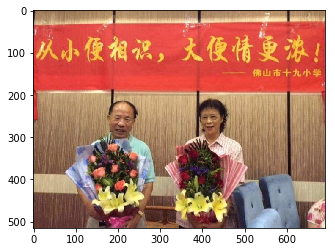

(515, 690, 3)


In [24]:
im=cv2.imread('./res/xbdb.png')
imshow(im)
print im.shape

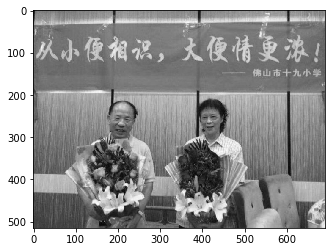

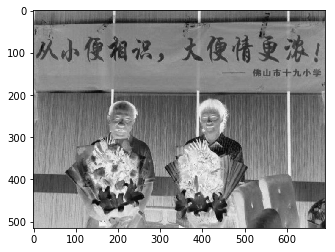

(515, 690)


In [25]:
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imshow(img)
imshow(255-img)
print img.shape

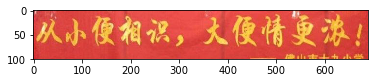

In [27]:
rect=im[50:150,]
imshow(rect)

关于opencv的其他api，在车牌识别中会涉及。

##### Pytorch
熟悉pytorch，可以先从tutorials的开始(这里调pytorch的指南)


Minist
来历，lecun，模型
数据集格式

纽约大学Yann LeCun构建，训练库60000张，验证库10000张，图片为黑色背景白色前景，28x28大小
用来识别信封上的手写邮政编码
数据集和从yann.lecun.com/exdb/mnist下载

下载解压后4个文件，文件格式定义是：
train-images-idx3-ubyte: 训练集图像，文件首4字节为2051
train-labels-idx1-ubyte: 训练集标签（即训练集图像对应的数字）文件首4字节为2049
t10k-images-idx3-ubyte:  测试集图像，文件首4字节为2051
t10k-labels-idx1-ubyte:  测试集标签，文件首4字节为2049
对图像文件，接下来8字节，分别是4字节的图像高度和宽度，都是28，然后就是每28\*28为一个图像。
对标签文件，接下来4字节是数据的数量，训练集是60000，测试集是10000。然后每个字节表示一个字符图像对应的数字值，和图像文件中的图像对应。